# Importing the nessecary dependencies.


In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest
%matplotlib inline

In [2]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 10, 5
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
#def run_tests():
#  unittest.main(argv=[''], verbosity=1, exit=False)

In [4]:
df_train = pd.read_csv('train.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
#df_train['OverallQual']

In [6]:
#df_train.isnull().sum()

In [7]:
#for col in df_train.columns:
#    print(col)

# Data exploration

In [8]:
# check correlation
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [9]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

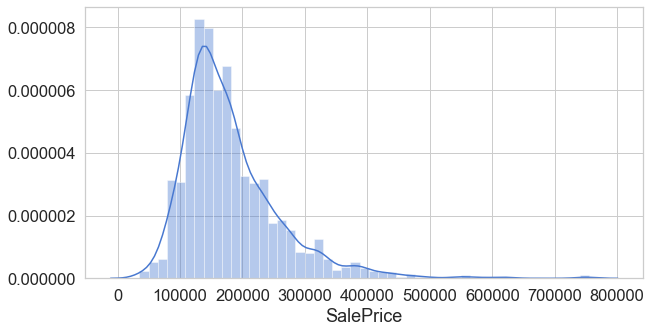

In [10]:
sns.distplot(df_train['SalePrice'])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


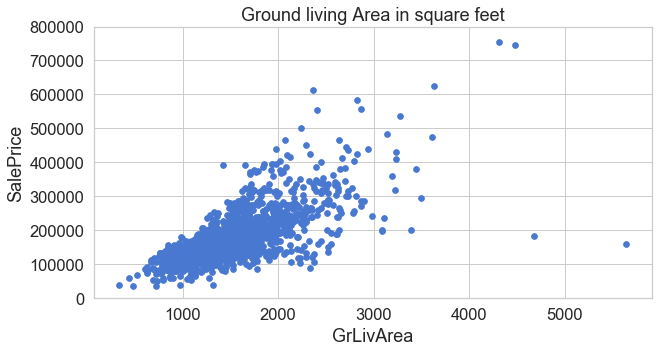

In [11]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32,title = 'Ground living Area in square feet');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


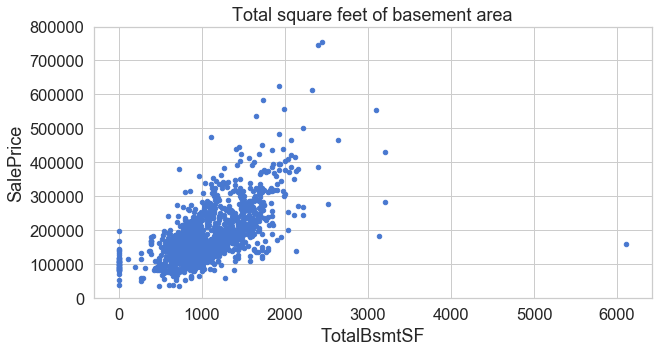

In [12]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), title='Total square feet of basement area');

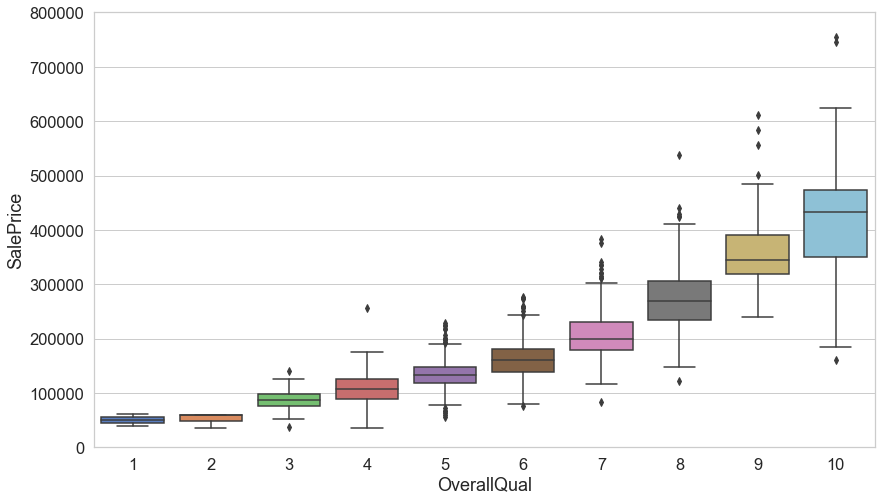

In [13]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


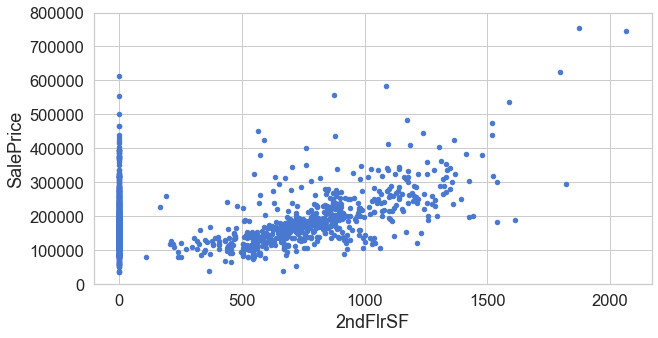

In [14]:
var = '2ndFlrSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

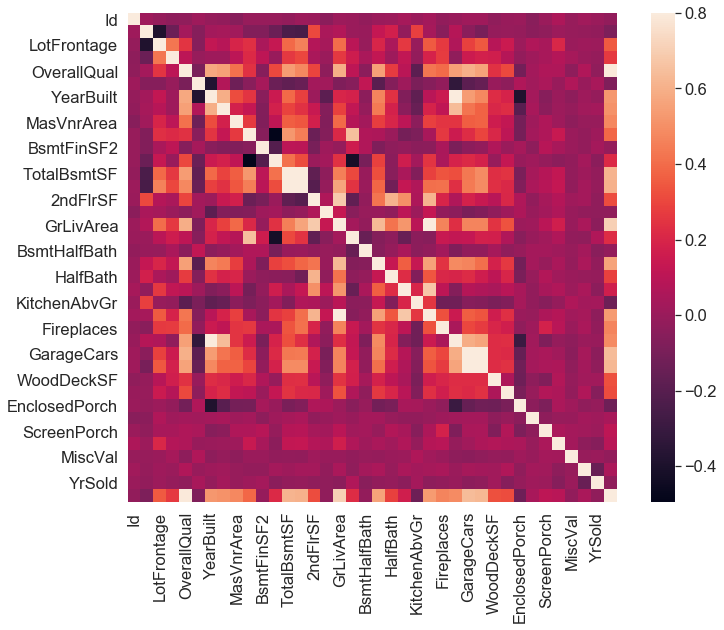

In [15]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

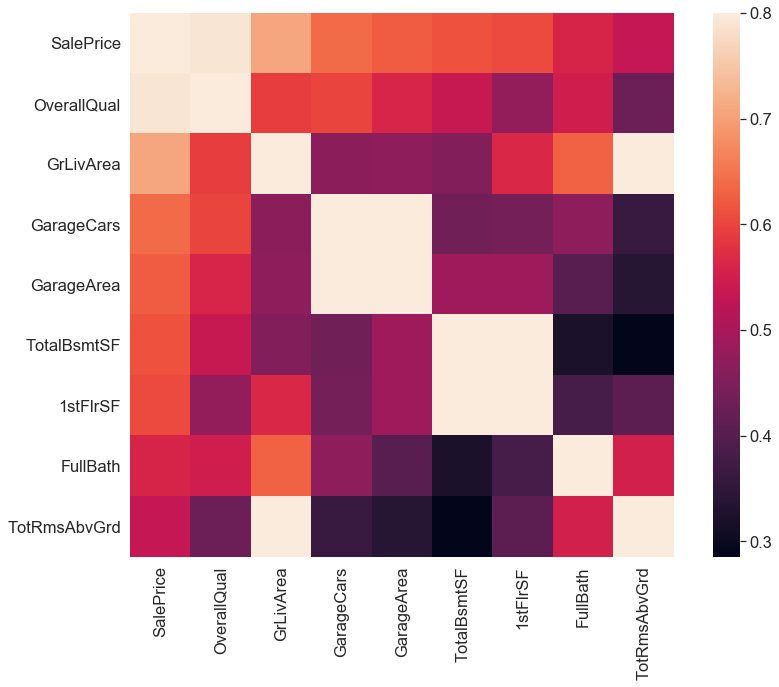

In [16]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_train[cols].corr(), vmax=.8, square=True);

# Selection of attributes with correlation > 30%

In [17]:
#df_train['BsmtFinSF1']

In [18]:
# creating new data set
New_data1 = df_train[['YearBuilt','2ndFlrSF','GrLivArea','FullBath','OverallQual','1stFlrSF','GarageCars','GarageArea','BedroomAbvGr','TotalBsmtSF','TotRmsAbvGrd','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','OpenPorchSF','HalfBath','LotArea','SalePrice']]

In [19]:
#New_data1

In [20]:
#New_data1.isnull().sum()

In [21]:
#New_data1['GarageYrBlt'].describe()

In [22]:
New_data1['GarageYrBlt'].fillna(New_data1['GarageYrBlt'].mean(),inplace = True)

E:\Anaconda\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [23]:
#New_data1['MasVnrArea'].describe()

In [24]:
New_data1['MasVnrArea'].fillna(New_data1['MasVnrArea'].mean(),inplace = True)

In [25]:
#New_data1.isnull().sum()

In [26]:
New_data1['LotFrontage'].fillna(New_data1['LotFrontage'].mean(),inplace = True)

In [27]:
#New_data1.isnull().sum()

In [28]:
#New_data1 = df_train[['YearBuilt','2ndFlrSF','GrLivArea','FullBath','OverallQual','1stFlrSF','GarageCars','GarageArea','BedroomAbvGr','TotalBsmtSF','TotRmsAbvGrd','YearRemodAdd','GarageYrBlt','SalePrice']]
X1 = New_data1.drop(columns=['SalePrice'])
Y1 = New_data1[['SalePrice']]
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.10, random_state=101)

# Feature Scalling

In [29]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X1_train = s_scaler.fit_transform(X1_train.astype(np.float))
X1_test = s_scaler.transform(X1_test.astype(np.float))

# Method1: Multiple Linear Regression

In [30]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X1_train, y1_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([[ 4222.07618662,  9591.64242284,  9074.73248548,  -587.37879293,
        26050.15761211, 10667.17045396,  8823.57194897,   184.15441676,
        -5944.51817505,  4916.42971309,  6703.45784044,  6499.36556062,
         1145.79084959,  5806.39417655,  3894.05077144,  6709.39149516,
          731.57807126,  3263.87931555,  1436.46386014,  -565.76044598,
         4957.70014172]])

In [31]:
y1_predd = regressor.predict(X1_test)
data1 = pd.DataFrame()
data1['Actual'] = list(y1_test['SalePrice'])
data1['Predicted'] = y1_predd
data1

,Actual,Predicted
0,255000,265538.608368
1,145000,135193.628718
2,150500,134261.729653
3,412500,371753.042140
4,402861,353266.652517
...,...,...
141,184000,188680.891091
142,95000,91113.759140
143,112500,92385.472921
144,163000,203393.185318


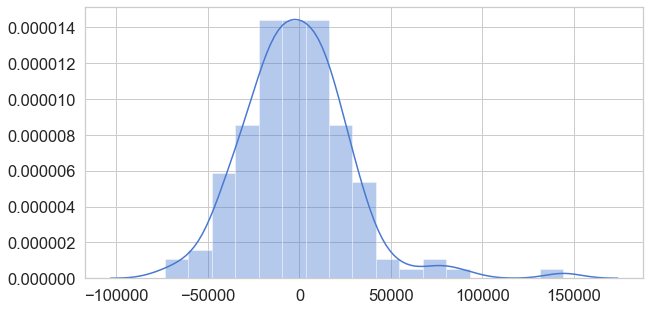

In [32]:
fig = plt.figure(figsize=(10,5))
residuals = (y1_test- y1_predd)
sns.distplot(residuals)

In [33]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y1_test, y1_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y1_test,y1_predd)))

Mean Absolute Error: 21586.65
Mean Squared Error:848975941.36
Root Mean Squared Error:29137.19
Variance score is: 0.83


In [34]:
New_data1['SalePrice'].mean()

180921.19589041095

In [35]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X1_train,y1_train)))
print("Test Score {:.2f}".format(regressor.score(X1_test, y1_test)))

Linear Regression Model:
Train Score 0.79
Test Score 0.83


# Method2: Keras Regression

### First Model of Neural Networks

In [36]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

E:\Anaconda\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [37]:
# having 19 nueron is based on the number of available featurs

model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Training the Model

In [38]:
y1_train = np.array(y1_train)


In [39]:
#model.fit(X_train, y_train, epochs=500, callbacks=[keras.callbacks.EarlyStopping(patience=3)])


model.fit(x=X1_train,y=y1_train,
          validation_data=(X1_test,y1_test),
          batch_size=128,epochs=400,)

Train on 1314 samples, validate on 146 samples
Epoch 1/400
1314/1314 [==============================] - 1s 1ms/sample - loss: 39291455852.7123 - val_loss: 36769256995.0685
Epoch 2/400
1314/1314 [==============================] - 0s 47us/sample - loss: 39291328141.0533 - val_loss: 36769012188.9315
Epoch 3/400
1314/1314 [==============================] - 0s 51us/sample - loss: 39290787266.4353 - val_loss: 36767902593.7534
Epoch 4/400
1314/1314 [==============================] - 0s 50us/sample - loss: 39288194532.7245 - val_loss: 36762594823.0137
Epoch 5/400
1314/1314 [==============================] - 0s 48us/sample - loss: 39275545978.7397 - val_loss: 36736170573.1507
Epoch 6/400
1314/1314 [==============================] - 0s 55us/sample - loss: 39213943628.7610 - val_loss: 36603536818.8493
Epoch 7/400
1314/1314 [==============================] - 0s 57us/sample - loss: 38879700552.4749 - val_loss: 35948732472.1096
Epoch 8/400
1314/1314 [==============================] - 0s 50us/sample 

1314/1314 [==============================] - 0s 66us/sample - loss: 1249723064.6941 - val_loss: 1069501785.4247
Epoch 67/400
1314/1314 [==============================] - 0s 53us/sample - loss: 1242243088.9985 - val_loss: 1066687849.2055
Epoch 68/400
1314/1314 [==============================] - 0s 45us/sample - loss: 1235490845.6134 - val_loss: 1065862021.2603
Epoch 69/400
1314/1314 [==============================] - 0s 45us/sample - loss: 1233846399.0259 - val_loss: 1072590664.7671
Epoch 70/400
1314/1314 [==============================] - 0s 46us/sample - loss: 1222072472.7428 - val_loss: 1068295311.7808
Epoch 71/400
1314/1314 [==============================] - 0s 83us/sample - loss: 1215585661.6621 - val_loss: 1060347297.3151
Epoch 72/400
1314/1314 [==============================] - 0s 94us/sample - loss: 1213889162.2283 - val_loss: 1058599211.8356
Epoch 73/400
1314/1314 [==============================] - 0s 84us/sample - loss: 1215146284.0304 - val_loss: 1061570141.8082
Epoch 74/400


1314/1314 [==============================] - 0s 45us/sample - loss: 1021773666.5814 - val_loss: 954117894.1370
Epoch 132/400
1314/1314 [==============================] - 0s 48us/sample - loss: 1026612194.7763 - val_loss: 952356373.0411
Epoch 133/400
1314/1314 [==============================] - 0s 65us/sample - loss: 1026698362.5449 - val_loss: 960792492.7123
Epoch 134/400
1314/1314 [==============================] - 0s 45us/sample - loss: 1043859176.7184 - val_loss: 946462609.5342
Epoch 135/400
1314/1314 [==============================] - 0s 44us/sample - loss: 1011251346.0213 - val_loss: 946829224.3288
Epoch 136/400
1314/1314 [==============================] - 0s 40us/sample - loss: 1032955935.1720 - val_loss: 974131296.4384
Epoch 137/400
1314/1314 [==============================] - 0s 37us/sample - loss: 1029010881.6560 - val_loss: 937979663.7808
Epoch 138/400
1314/1314 [==============================] - 0s 47us/sample - loss: 1029332215.4277 - val_loss: 941812545.3151
Epoch 139/400


1314/1314 [==============================] - 0s 47us/sample - loss: 866990431.2694 - val_loss: 864699327.1233
Epoch 198/400
1314/1314 [==============================] - 0s 58us/sample - loss: 864107221.1385 - val_loss: 869775065.4247
Epoch 199/400
1314/1314 [==============================] - 0s 60us/sample - loss: 865949519.4886 - val_loss: 890794910.6849
Epoch 200/400
1314/1314 [==============================] - 0s 47us/sample - loss: 854314508.6636 - val_loss: 866757095.4521
Epoch 201/400
1314/1314 [==============================] - 0s 46us/sample - loss: 857297547.2998 - val_loss: 874839628.2740
Epoch 202/400
1314/1314 [==============================] - 0s 74us/sample - loss: 857783218.3623 - val_loss: 870548578.1918
Epoch 203/400
1314/1314 [==============================] - 0s 70us/sample - loss: 857801444.9193 - val_loss: 886168768.8767
Epoch 204/400
1314/1314 [==============================] - 0s 90us/sample - loss: 846781482.4718 - val_loss: 865576517.2603
Epoch 205/400
1314/131

1314/1314 [==============================] - 0s 49us/sample - loss: 775485910.9893 - val_loss: 870250762.5205
Epoch 264/400
1314/1314 [==============================] - 0s 54us/sample - loss: 762049477.7473 - val_loss: 876916248.5479
Epoch 265/400
1314/1314 [==============================] - 0s 51us/sample - loss: 772726170.4962 - val_loss: 903498215.4521
Epoch 266/400
1314/1314 [==============================] - 0s 51us/sample - loss: 780492564.9924 - val_loss: 965312045.5890
Epoch 267/400
1314/1314 [==============================] - 0s 46us/sample - loss: 792081831.5495 - val_loss: 884983977.2055
Epoch 268/400
1314/1314 [==============================] - 0s 97us/sample - loss: 766762280.9132 - val_loss: 891347164.9315
Epoch 269/400
1314/1314 [==============================] - 0s 102us/sample - loss: 765955398.5266 - val_loss: 874469319.8904
Epoch 270/400
1314/1314 [==============================] - 0s 68us/sample - loss: 747677940.3592 - val_loss: 875144745.6438
Epoch 271/400
1314/13

1314/1314 [==============================] - 0s 58us/sample - loss: 656995614.1492 - val_loss: 960466207.5616
Epoch 330/400
1314/1314 [==============================] - 0s 51us/sample - loss: 650536345.3272 - val_loss: 939630079.1233
Epoch 331/400
1314/1314 [==============================] - 0s 50us/sample - loss: 645130308.4323 - val_loss: 929680531.2877
Epoch 332/400
1314/1314 [==============================] - 0s 56us/sample - loss: 646578975.7565 - val_loss: 1087889487.7808
Epoch 333/400
1314/1314 [==============================] - 0s 50us/sample - loss: 674399535.3425 - val_loss: 925924170.5205
Epoch 334/400
1314/1314 [==============================] - 0s 48us/sample - loss: 662904516.5784 - val_loss: 928760310.3562
Epoch 335/400
1314/1314 [==============================] - 0s 49us/sample - loss: 650313432.2070 - val_loss: 935702930.4110
Epoch 336/400
1314/1314 [==============================] - 0s 49us/sample - loss: 686167234.4840 - val_loss: 926498218.9589
Epoch 337/400
1314/13

1314/1314 [==============================] - 0s 52us/sample - loss: 560271801.2785 - val_loss: 884537223.0137
Epoch 396/400
1314/1314 [==============================] - 0s 47us/sample - loss: 563843020.4688 - val_loss: 880704603.1781
Epoch 397/400
1314/1314 [==============================] - 0s 46us/sample - loss: 553066778.0578 - val_loss: 887237481.6438
Epoch 398/400
1314/1314 [==============================] - 0s 47us/sample - loss: 555441478.1857 - val_loss: 922036096.8767
Epoch 399/400
1314/1314 [==============================] - 0s 49us/sample - loss: 552373451.1537 - val_loss: 908055778.1918
Epoch 400/400
1314/1314 [==============================] - 0s 71us/sample - loss: 555771158.7702 - val_loss: 895283146.5205


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  418       
_________________________________________________________________
dense_1 (Dense)              multiple                  380       
_________________________________________________________________
dense_2 (Dense)              multiple                  380       
_________________________________________________________________
dense_3 (Dense)              multiple                  380       
_________________________________________________________________
dense_4 (Dense)              multiple                  380       
_________________________________________________________________
dense_5 (Dense)              multiple                  380       
_________________________________________________________________
dense_6 (Dense)              multiple                  3

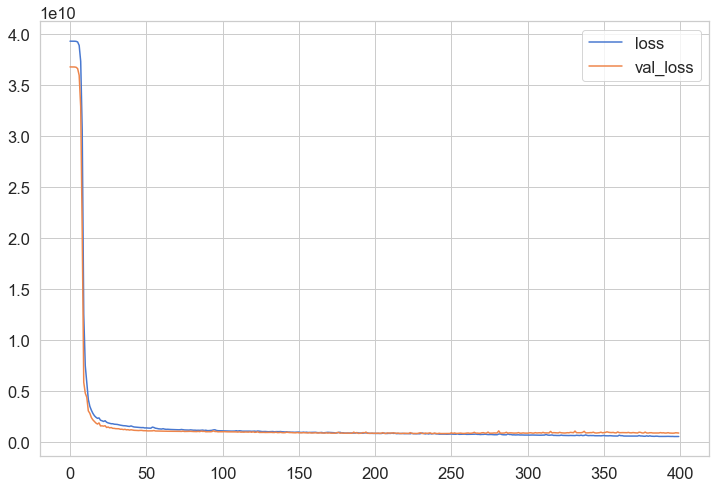

In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [42]:
# Evaluation on Test Data

In [43]:
y1_pred = model.predict(X1_test)

In [44]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y1_test, y1_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y1_test,y1_pred)))

Mean Absolute Error: 20484.82
Mean Squared Error: 895283188.08
Root Mean Squared Error: 29921.28
Variance score is: 0.82


In [45]:
New_data1['SalePrice'].mean()

180921.19589041095

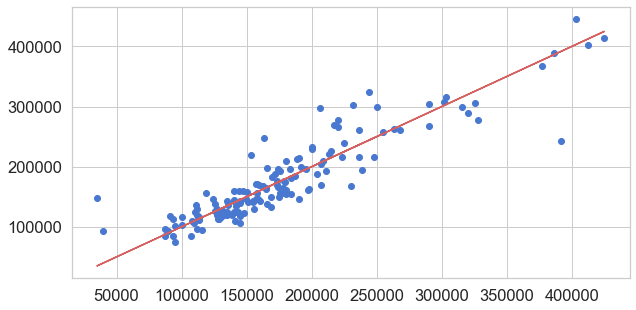

In [46]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y1_test,y1_pred)

# Perfect predictions
plt.plot(y1_test,y1_test,'r')

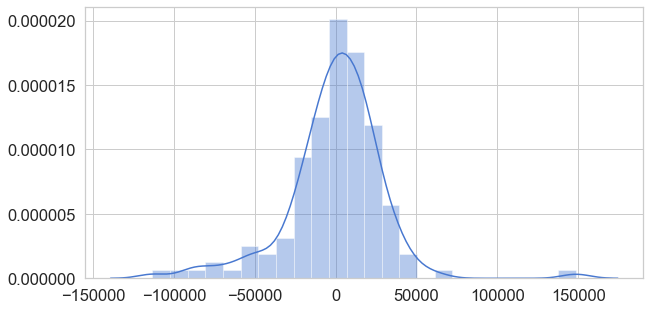

In [47]:
fig = plt.figure(figsize=(10,5))
residuals = (y1_test- y1_pred)
sns.distplot(residuals)

# Multiple Linear Regression vs Keras Regression

In [48]:
print('Model: Keras Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y1_test, y1_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y1_test,y1_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y1_test, y1_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_predd))))
print('Score: {:.2f}'.format(metrics.explained_variance_score(y1_test,y1_predd)*100))

Model: Keras Regression

Mean Absolute Error(MAE): 20484.82
Mean Squared Error(MSE): 895283188.08
Root Mean Squared Error(RMSE): 29921.28
Variance score: 82.36

*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 21586.65
Mean Squared Error(MSE):848975941.36
Root Mean Squared Error(RMSE):29137.19
Score: 83.30


### 2nd Model Of Neural Network

In [49]:
# having 19 nueron is based on the number of available featurs

model2 = Sequential()

#model2.add(Dense(19,activation='selu'))
#model2.add(Dense(19,activation='selu'))
#model2.add(Dense(19,activation='selu'))
#model2.add(Dense(19,activation='selu'))
#model2.add(Dense(19,activation='selu'))
#model2.add(Dense(19,activation='selu'))
#model2.add(Dense(19,activation='selu'))
#model2.add(Dense(19,activation='selu'))
#model2.add(Dense(19,activation='selu'))

model2.add(Dense(19,activation='elu'))
model2.add(Dense(19,activation='elu'))
model2.add(Dense(19,activation='elu'))
model2.add(Dense(19,activation='elu'))
model2.add(Dense(19,activation='elu'))
model2.add(Dense(19,activation='elu'))
model2.add(Dense(19,activation='elu'))
model2.add(Dense(19,activation='elu'))
model2.add(Dense(19,activation='elu'))

model2.add(Dense(1))

model2.compile(optimizer='adam',loss='mse')

In [50]:
model2.fit(x=X1_train,y=y1_train,
          validation_data=(X1_test,y1_test),
          batch_size=128,epochs=300,)

Train on 1314 samples, validate on 146 samples
Epoch 1/300
1314/1314 [==============================] - 1s 1ms/sample - loss: 39291286239.6591 - val_loss: 36768862151.8904
Epoch 2/300
1314/1314 [==============================] - 0s 49us/sample - loss: 39290759619.9939 - val_loss: 36768218799.3425
Epoch 3/300
1314/1314 [==============================] - 0s 53us/sample - loss: 39289941978.5936 - val_loss: 36767220778.0822
Epoch 4/300
1314/1314 [==============================] - 0s 28us/sample - loss: 39288711152.4140 - val_loss: 36765686517.4795
Epoch 5/300
1314/1314 [==============================] - 0s 39us/sample - loss: 39286759741.9543 - val_loss: 36763093188.3836
Epoch 6/300
1314/1314 [==============================] - 0s 51us/sample - loss: 39283075617.5099 - val_loss: 36757685823.1233
Epoch 7/300
1314/1314 [==============================] - 0s 62us/sample - loss: 39274626535.8417 - val_loss: 36744272741.6986
Epoch 8/300
1314/1314 [==============================] - 0s 57us/sample 

1314/1314 [==============================] - 0s 49us/sample - loss: 1298426462.2953 - val_loss: 852357945.8630
Epoch 67/300
1314/1314 [==============================] - 0s 48us/sample - loss: 1306635132.8828 - val_loss: 918329557.9178
Epoch 68/300
1314/1314 [==============================] - 0s 49us/sample - loss: 1289627994.3988 - val_loss: 851000643.5068
Epoch 69/300
1314/1314 [==============================] - 0s 48us/sample - loss: 1266729298.2161 - val_loss: 843586957.1507
Epoch 70/300
1314/1314 [==============================] - 0s 46us/sample - loss: 1255882017.1202 - val_loss: 837344213.0411
Epoch 71/300
1314/1314 [==============================] - 0s 49us/sample - loss: 1247512944.9985 - val_loss: 839616212.1644
Epoch 72/300
1314/1314 [==============================] - 0s 50us/sample - loss: 1239790589.9543 - val_loss: 827829979.1781
Epoch 73/300
1314/1314 [==============================] - 0s 53us/sample - loss: 1237787833.4734 - val_loss: 826534165.0411
Epoch 74/300
1314/131

Epoch 132/300
1314/1314 [==============================] - 0s 48us/sample - loss: 990545932.8097 - val_loss: 758943310.9041
Epoch 133/300
1314/1314 [==============================] - 0s 48us/sample - loss: 1009843022.4170 - val_loss: 767313215.1233
Epoch 134/300
1314/1314 [==============================] - 0s 48us/sample - loss: 979894827.5921 - val_loss: 763809667.5068
Epoch 135/300
1314/1314 [==============================] - 0s 44us/sample - loss: 970589074.6058 - val_loss: 769000677.6986
Epoch 136/300
1314/1314 [==============================] - 0s 51us/sample - loss: 965539618.5814 - val_loss: 753948889.4247
Epoch 137/300
1314/1314 [==============================] - 0s 64us/sample - loss: 962249552.6088 - val_loss: 755788711.0137
Epoch 138/300
1314/1314 [==============================] - 0s 50us/sample - loss: 973994414.1248 - val_loss: 752965285.2603
Epoch 139/300
1314/1314 [==============================] - 0s 56us/sample - loss: 958044191.1720 - val_loss: 752928506.7397
Epoch 1

1314/1314 [==============================] - 0s 32us/sample - loss: 780464682.7641 - val_loss: 717630937.4247
Epoch 199/300
1314/1314 [==============================] - 0s 30us/sample - loss: 789747238.9650 - val_loss: 715601822.2466
Epoch 200/300
1314/1314 [==============================] - 0s 32us/sample - loss: 774742172.6393 - val_loss: 721426386.4110
Epoch 201/300
1314/1314 [==============================] - 0s 30us/sample - loss: 765492409.8630 - val_loss: 716018071.2329
Epoch 202/300
1314/1314 [==============================] - 0s 40us/sample - loss: 760654514.5571 - val_loss: 718330461.8082
Epoch 203/300
1314/1314 [==============================] - 0s 46us/sample - loss: 756745579.7869 - val_loss: 715919962.3014
Epoch 204/300
1314/1314 [==============================] - 0s 49us/sample - loss: 760086742.8919 - val_loss: 714508221.3699
Epoch 205/300
1314/1314 [==============================] - 0s 51us/sample - loss: 762573040.8037 - val_loss: 720621589.9178
Epoch 206/300
1314/131

1314/1314 [==============================] - 0s 83us/sample - loss: 640944081.2907 - val_loss: 724582859.3973
Epoch 265/300
1314/1314 [==============================] - 0s 79us/sample - loss: 647284561.4368 - val_loss: 722420152.5479
Epoch 266/300
1314/1314 [==============================] - 0s 81us/sample - loss: 637840476.2496 - val_loss: 725134866.4110
Epoch 267/300
1314/1314 [==============================] - 0s 82us/sample - loss: 643957146.7884 - val_loss: 724858183.0137
Epoch 268/300
1314/1314 [==============================] - 0s 87us/sample - loss: 634239677.7595 - val_loss: 726768846.9041
Epoch 269/300
1314/1314 [==============================] - 0s 75us/sample - loss: 654349210.3988 - val_loss: 718754085.2603
Epoch 270/300
1314/1314 [==============================] - 0s 98us/sample - loss: 637084490.8128 - val_loss: 718293650.4110
Epoch 271/300
1314/1314 [==============================] - 0s 64us/sample - loss: 630732455.5495 - val_loss: 715332705.3151
Epoch 272/300
1314/131

In [51]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             multiple                  418       
_________________________________________________________________
dense_15 (Dense)             multiple                  380       
_________________________________________________________________
dense_16 (Dense)             multiple                  380       
_________________________________________________________________
dense_17 (Dense)             multiple                  380       
_________________________________________________________________
dense_18 (Dense)             multiple                  380       
_________________________________________________________________
dense_19 (Dense)             multiple                  380       
_________________________________________________________________
dense_20 (Dense)             multiple                 

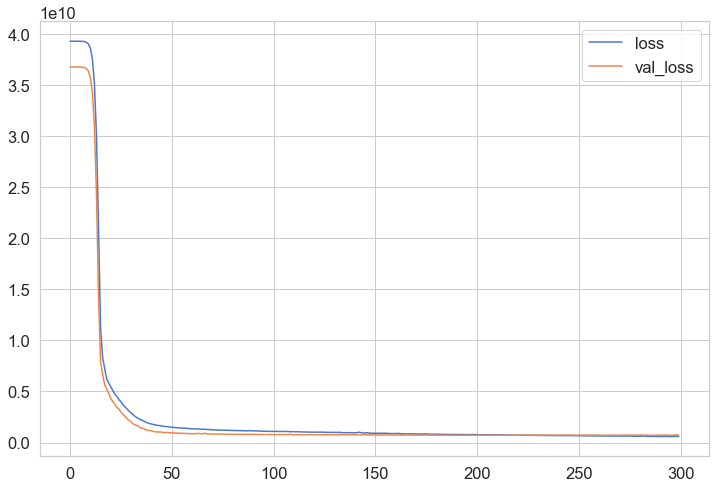

In [52]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot(figsize=(12,8))

In [53]:
y1_predict = model2.predict(X1_test)

In [54]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_predict)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y1_test, y1_predict)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_predict))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y1_test,y1_predict)))

Mean Absolute Error: 18331.44
Mean Squared Error: 718061379.25
Root Mean Squared Error: 26796.67
Variance score is: 0.86


### 3rd Model of Neural Network

In [55]:
# having 19 nueron is based on the number of available featurs

model3 = Sequential()

model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))

#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))

model3.add(Dense(1))

model3.compile(optimizer='adam',loss='mse')

In [56]:
model3.fit(x=X1_train,y=y1_train,
          validation_data=(X1_test,y1_test),
          batch_size=128,epochs=300,)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1314 samples, validate on 146 samples
Epoch 1/300
1314/1314 [==============================] - 2s 1ms/sample - loss: 39291209886.9772 - val_loss: 36768881173.0411
Epoch 2/300
1314/1314 [==============================] - 0s 64us/sample - loss: 39290818715.8600 - val_loss: 36768479119.7808
Epoch 3/300
1314/1314 [==============================] - 0s 64us/sample - loss: 39290338074.8858 - val_loss: 36767951886.0274
Epoch 4/300
1314/1314 [==============================] - 0s 62us/sample - loss: 39289696467.9696 - val_loss: 36767244344.1096
Epoch 5/300
1314/1314 [==============================] - 0s 59us/sample - loss: 39288841395.2390 - val_loss: 36766249857.7534
Epoch 6/300
1314/1314 [==============================] - 0s 66us/sample - loss: 39287644767.8539 - val_loss: 36764798302.6849
Epoch 7/300
1314/1314 [==============================] - 0s 61us/sample - loss: 39285872094.4901 - val_l

1314/1314 [==============================] - 0s 59us/sample - loss: 3202711026.7519 - val_loss: 2486874862.4658
Epoch 64/300
1314/1314 [==============================] - 0s 63us/sample - loss: 3154742130.1674 - val_loss: 2476192666.3014
Epoch 65/300
1314/1314 [==============================] - 0s 67us/sample - loss: 3112465094.5266 - val_loss: 2442177855.1233
Epoch 66/300
1314/1314 [==============================] - 0s 65us/sample - loss: 3082361631.1720 - val_loss: 2404906513.5342
Epoch 67/300
1314/1314 [==============================] - 0s 67us/sample - loss: 3048701023.2694 - val_loss: 2378480501.4795
Epoch 68/300
1314/1314 [==============================] - 0s 66us/sample - loss: 3012122902.9893 - val_loss: 2341941717.9178
Epoch 69/300
1314/1314 [==============================] - 0s 62us/sample - loss: 2980871387.7626 - val_loss: 2320737127.4521
Epoch 70/300
1314/1314 [==============================] - 0s 67us/sample - loss: 2946888188.8828 - val_loss: 2291821399.6712
Epoch 71/300


1314/1314 [==============================] - 0s 58us/sample - loss: 1818536702.5388 - val_loss: 1223079233.7534
Epoch 129/300
1314/1314 [==============================] - 0s 58us/sample - loss: 1811646077.4673 - val_loss: 1213369266.8493
Epoch 130/300
1314/1314 [==============================] - 0s 59us/sample - loss: 1801476558.1248 - val_loss: 1204664568.1096
Epoch 131/300
1314/1314 [==============================] - 0s 60us/sample - loss: 1800761886.9772 - val_loss: 1203714210.1918
Epoch 132/300
1314/1314 [==============================] - 0s 57us/sample - loss: 1787812977.4855 - val_loss: 1203860388.8219
Epoch 133/300
1314/1314 [==============================] - 0s 53us/sample - loss: 1780761750.4049 - val_loss: 1199733484.7123
Epoch 134/300
1314/1314 [==============================] - 0s 66us/sample - loss: 1775622479.0989 - val_loss: 1193011777.7534
Epoch 135/300
1314/1314 [==============================] - 0s 66us/sample - loss: 1771360669.2237 - val_loss: 1184029357.5890
Epoch 

1314/1314 [==============================] - 0s 67us/sample - loss: 1544180914.8493 - val_loss: 977763520.8767
Epoch 194/300
1314/1314 [==============================] - 0s 88us/sample - loss: 1543853695.6104 - val_loss: 973654841.8630
Epoch 195/300
1314/1314 [==============================] - 0s 79us/sample - loss: 1542987898.0578 - val_loss: 974974057.2055
Epoch 196/300
1314/1314 [==============================] - 0s 62us/sample - loss: 1537028470.4536 - val_loss: 974680302.4658
Epoch 197/300
1314/1314 [==============================] - 0s 75us/sample - loss: 1536629534.1979 - val_loss: 976970289.0959
Epoch 198/300
1314/1314 [==============================] - 0s 58us/sample - loss: 1540657518.3683 - val_loss: 975366155.3973
Epoch 199/300
1314/1314 [==============================] - 0s 51us/sample - loss: 1532939664.3166 - val_loss: 971128617.2055
Epoch 200/300
1314/1314 [==============================] - 0s 44us/sample - loss: 1529931267.9939 - val_loss: 968237627.6164
Epoch 201/300


1314/1314 [==============================] - 0s 60us/sample - loss: 1425981470.7823 - val_loss: 873763114.0822
Epoch 259/300
1314/1314 [==============================] - 0s 57us/sample - loss: 1429229480.9132 - val_loss: 875460405.4795
Epoch 260/300
1314/1314 [==============================] - 0s 59us/sample - loss: 1418086594.4353 - val_loss: 873523477.9178
Epoch 261/300
1314/1314 [==============================] - 0s 65us/sample - loss: 1418774705.6804 - val_loss: 868360928.4384
Epoch 262/300
1314/1314 [==============================] - 0s 72us/sample - loss: 1415521280.0000 - val_loss: 868594012.9315
Epoch 263/300
1314/1314 [==============================] - 0s 52us/sample - loss: 1411976753.8752 - val_loss: 867933434.7397
Epoch 264/300
1314/1314 [==============================] - 0s 49us/sample - loss: 1416552109.6865 - val_loss: 864834935.2329
Epoch 265/300
1314/1314 [==============================] - 0s 50us/sample - loss: 1419171944.9132 - val_loss: 868035645.3699
Epoch 266/300


In [57]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             multiple                  198       
_________________________________________________________________
dense_25 (Dense)             multiple                  90        
_________________________________________________________________
dense_26 (Dense)             multiple                  90        
_________________________________________________________________
dense_27 (Dense)             multiple                  90        
_________________________________________________________________
dense_28 (Dense)             multiple                  90        
_________________________________________________________________
dense_29 (Dense)             multiple                  90        
_________________________________________________________________
dense_30 (Dense)             multiple                 

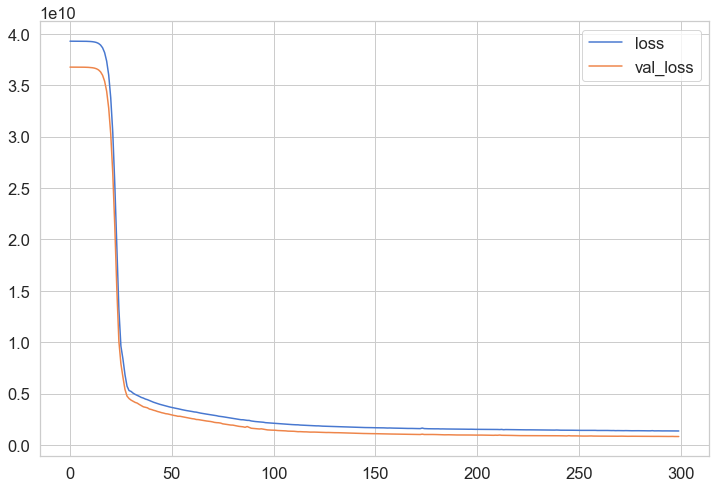

In [58]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.plot(figsize=(12,8))

In [59]:
y3_predict = model3.predict(X1_test)

In [60]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y3_predict)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y1_test, y3_predict)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y3_predict))))
print('Variance Score is: {:.2f}'.format(metrics.explained_variance_score(y1_test,y3_predict)))

Mean Absolute Error: 20845.60
Mean Squared Error: 828870604.11
Root Mean Squared Error: 28790.11
Variance Score is: 0.84


## 4rth Model Neural Network

In [61]:
model4 = Sequential()

model4.add(Dense(5,activation='selu'))
model4.add(Dense(6,activation='elu'))
model4.add(Dense(7,activation='relu'))
model4.add(Dense(8,activation='elu'))
model4.add(Dense(10,activation='relu'))
model4.add(Dense(9,activation='selu'))
model4.add(Dense(12,activation='elu'))
model4.add(Dense(11,activation='relu'))
model4.add(Dense(14,activation='selu'))
model4.add(Dense(7,activation='selu'))
model4.add(Dense(9,activation='elu'))

#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))

model4.add(Dense(1))

model4.compile(optimizer='adam',loss='mse')

In [62]:
model4.fit(x=X1_train,y=y1_train,
          validation_data=(X1_test,y1_test),
          batch_size=128,epochs=300,)

Train on 1314 samples, validate on 146 samples
Epoch 1/300
1314/1314 [==============================] - 2s 2ms/sample - loss: 39291496351.3668 - val_loss: 36769261539.9452
Epoch 2/300
1314/1314 [==============================] - 0s 60us/sample - loss: 39291379356.6393 - val_loss: 36769162338.1918
Epoch 3/300
1314/1314 [==============================] - 0s 57us/sample - loss: 39291259437.9787 - val_loss: 36769011627.8356
Epoch 4/300
1314/1314 [==============================] - 0s 61us/sample - loss: 39291063017.0107 - val_loss: 36768754561.7534
Epoch 5/300
1314/1314 [==============================] - 0s 59us/sample - loss: 39290738837.6256 - val_loss: 36768343194.3014
Epoch 6/300
1314/1314 [==============================] - 0s 70us/sample - loss: 39290271747.1172 - val_loss: 36767831699.2877
Epoch 7/300
1314/1314 [==============================] - ETA: 0s - loss: 39445432320.000 - 0s 59us/sample - loss: 39289726954.1796 - val_loss: 36767264206.9041
Epoch 8/300
1314/1314 [===============

1314/1314 [==============================] - 0s 112us/sample - loss: 2984892586.6667 - val_loss: 2850199658.9589
Epoch 66/300
1314/1314 [==============================] - 0s 48us/sample - loss: 2891944088.7428 - val_loss: 2775031923.7260
Epoch 67/300
1314/1314 [==============================] - 0s 51us/sample - loss: 2818567782.8676 - val_loss: 2669772480.8767
Epoch 68/300
1314/1314 [==============================] - 0s 59us/sample - loss: 2738421421.1994 - val_loss: 2633367390.6849
Epoch 69/300
1314/1314 [==============================] - 0s 103us/sample - loss: 2681624726.9893 - val_loss: 2550738768.6575
Epoch 70/300
1314/1314 [==============================] - 0s 105us/sample - loss: 2620667778.3379 - val_loss: 2476131773.3699
Epoch 71/300
1314/1314 [==============================] - 0s 91us/sample - loss: 2567832080.3653 - val_loss: 2430064611.9452
Epoch 72/300
1314/1314 [==============================] - 0s 88us/sample - loss: 2506607009.7047 - val_loss: 2370057507.0685
Epoch 73/3

1314/1314 [==============================] - 0s 49us/sample - loss: 1076151085.7839 - val_loss: 941532774.5753
Epoch 131/300
1314/1314 [==============================] - 0s 85us/sample - loss: 1072210402.1918 - val_loss: 942632207.7808
Epoch 132/300
1314/1314 [==============================] - 0s 91us/sample - loss: 1065928108.3714 - val_loss: 950672260.3836
Epoch 133/300
1314/1314 [==============================] - 0s 109us/sample - loss: 1054750483.8721 - val_loss: 917709446.1370
Epoch 134/300
1314/1314 [==============================] - 0s 103us/sample - loss: 1045425716.4079 - val_loss: 932862178.6301
Epoch 135/300
1314/1314 [==============================] - 0s 48us/sample - loss: 1060919093.7717 - val_loss: 900763064.9863
Epoch 136/300
1314/1314 [==============================] - 0s 59us/sample - loss: 1043177098.5205 - val_loss: 896338644.1644
Epoch 137/300
1314/1314 [==============================] - 0s 98us/sample - loss: 1039094827.8356 - val_loss: 917152785.5342
Epoch 138/30

1314/1314 [==============================] - 0s 49us/sample - loss: 719619551.5616 - val_loss: 730234749.3699
Epoch 197/300
1314/1314 [==============================] - 0s 50us/sample - loss: 710893995.2511 - val_loss: 700945578.0822
Epoch 198/300
1314/1314 [==============================] - 0s 51us/sample - loss: 739102154.4718 - val_loss: 750570606.4658
Epoch 199/300
1314/1314 [==============================] - 0s 48us/sample - loss: 700266187.0076 - val_loss: 695580685.1507
Epoch 200/300
1314/1314 [==============================] - 0s 54us/sample - loss: 716798595.8965 - val_loss: 725208148.1644
Epoch 201/300
1314/1314 [==============================] - 0s 84us/sample - loss: 699325278.0030 - val_loss: 732859848.7671
Epoch 202/300
1314/1314 [==============================] - 0s 88us/sample - loss: 701814947.0685 - val_loss: 701148440.5479
Epoch 203/300
1314/1314 [==============================] - 0s 103us/sample - loss: 705569942.8432 - val_loss: 693614121.2055
Epoch 204/300
1314/13

1314/1314 [==============================] - 0s 63us/sample - loss: 533833895.0624 - val_loss: 663761599.1233
Epoch 263/300
1314/1314 [==============================] - 0s 72us/sample - loss: 526976958.2466 - val_loss: 681826633.6438
Epoch 264/300
1314/1314 [==============================] - 0s 77us/sample - loss: 526869649.5342 - val_loss: 657636835.0685
Epoch 265/300
1314/1314 [==============================] - 0s 72us/sample - loss: 526570041.5708 - val_loss: 655919414.3562
Epoch 266/300
1314/1314 [==============================] - 0s 62us/sample - loss: 527719046.5266 - val_loss: 654236703.5616
Epoch 267/300
1314/1314 [==============================] - 0s 56us/sample - loss: 524082270.7823 - val_loss: 665496672.0000
Epoch 268/300
1314/1314 [==============================] - 0s 71us/sample - loss: 524358006.9406 - val_loss: 678698394.3014
Epoch 269/300
1314/1314 [==============================] - 0s 72us/sample - loss: 530023249.6804 - val_loss: 690135698.4110
Epoch 270/300
1314/131

In [63]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             multiple                  110       
_________________________________________________________________
dense_35 (Dense)             multiple                  36        
_________________________________________________________________
dense_36 (Dense)             multiple                  49        
_________________________________________________________________
dense_37 (Dense)             multiple                  64        
_________________________________________________________________
dense_38 (Dense)             multiple                  90        
_________________________________________________________________
dense_39 (Dense)             multiple                  99        
_________________________________________________________________
dense_40 (Dense)             multiple                 

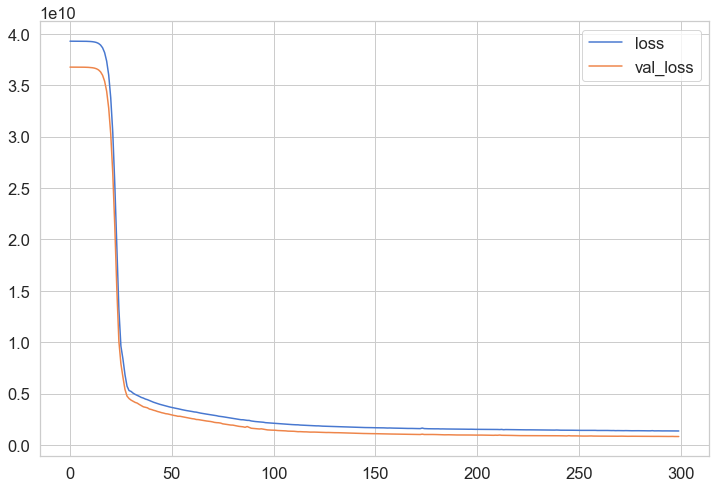

In [64]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.plot(figsize=(12,8))

In [65]:
y4_predict = model4.predict(X1_test)

In [66]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y4_predict)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y1_test, y4_predict)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y4_predict))))
print('Score is: {:.2f}'.format(metrics.explained_variance_score(y1_test,y4_predict)))

Mean Absolute Error: 18233.89
Mean Squared Error: 670545313.44
Root Mean Squared Error: 25894.89
Score is: 0.87


# Selection of attributes with correlation  >50%

In [67]:
#df_train['YearRemodAdd']

In [68]:
#SalePrice        1.000000
#OverallQual      0.790982
#GrLivArea        0.708624
#GarageCars       0.640409
#GarageArea       0.623431
#TotalBsmtSF      0.613581
#1stFlrSF         0.605852
#FullBath         0.560664
#TotRmsAbvGrd     0.533723
#YearBuilt        0.522897
#YearRemodAdd     0.507101

In [69]:
New_data = df_train[['YearBuilt','2ndFlrSF','GrLivArea','FullBath','OverallQual','1stFlrSF','GarageCars','GarageArea','BedroomAbvGr','TotalBsmtSF','TotRmsAbvGrd','YearRemodAdd','SalePrice']]
X = New_data.drop(columns=['SalePrice'])
Y = New_data[['SalePrice']]


#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=101)

In [70]:
#New_data.isnull().sum()

# Feature Scalling

In [71]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

# Method1: Multiple Linear Regression

In [72]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([[ 7237.15482294, 17195.05801124,  7175.50588066, -2662.43157388,
        26115.56744094, 19793.64777753,  8502.58014613,  2128.32730116,
        -6969.06093077,  9070.15803518,  5176.50595989,  5369.57692305]])

In [73]:
y_predd = regressor.predict(X_test)
data = pd.DataFrame()
data['Actual'] = list(y_test['SalePrice'])
data['Predicted'] = y_predd
data

,Actual,Predicted
0,255000,255319.234393
1,145000,141610.283360
2,150500,135875.430764
3,412500,348852.435250
4,402861,348795.328654
...,...,...
141,184000,187106.095063
142,95000,93057.416306
143,112500,99896.937737
144,163000,196664.615458


In [74]:
# y_predd = regressor.predict(X_test)
# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
# df1 = df.head(10)
# df1
#data['Predicted'] = y_predd

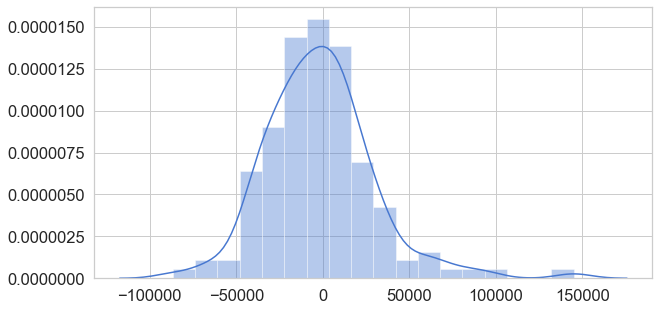

In [75]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_predd)
sns.distplot(residuals)

In [76]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

Mean Absolute Error: 23208.65
Mean Squared Error:984141394.09
Root Mean Squared Error:31371.03
Variance score is: 0.81


In [77]:
New_data['SalePrice'].mean()

180921.19589041095

In [78]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.78
Test Score 0.81


# Method2: Keras Regression

In [79]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [80]:
# having 19 nueron is based on the number of available featurs

model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Training the Model

In [81]:
y_train = np.array(y_train)


In [82]:
#model.fit(X_train, y_train, epochs=500, callbacks=[keras.callbacks.EarlyStopping(patience=3)])


model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=550,)

Train on 1314 samples, validate on 146 samples
Epoch 1/550
1314/1314 [==============================] - 2s 2ms/sample - loss: 39291463240.4749 - val_loss: 36769268553.6438
Epoch 2/550
1314/1314 [==============================] - 0s 42us/sample - loss: 39291381108.5053 - val_loss: 36769153697.3151
Epoch 3/550
1314/1314 [==============================] - 0s 53us/sample - loss: 39291182041.0350 - val_loss: 36768817152.0000
Epoch 4/550
1314/1314 [==============================] - 0s 51us/sample - loss: 39290598816.1461 - val_loss: 36767828052.1644
Epoch 5/550
1314/1314 [==============================] - 0s 56us/sample - loss: 39288727654.8676 - val_loss: 36764601919.1233
Epoch 6/550
1314/1314 [==============================] - 0s 49us/sample - loss: 39282560487.8417 - val_loss: 36753657126.5753
Epoch 7/550
1314/1314 [==============================] - 0s 43us/sample - loss: 39261339093.1385 - val_loss: 36716690333.8082
Epoch 8/550
1314/1314 [==============================] - 0s 50us/sample 

1314/1314 [==============================] - 0s 79us/sample - loss: 1451786326.6971 - val_loss: 957497713.0959
Epoch 67/550
1314/1314 [==============================] - 0s 75us/sample - loss: 1433843878.3805 - val_loss: 955114620.4932
Epoch 68/550
1314/1314 [==============================] - 0s 79us/sample - loss: 1428022107.0807 - val_loss: 947435162.3014
Epoch 69/550
1314/1314 [==============================] - 0s 101us/sample - loss: 1416584643.0198 - val_loss: 947140439.6712
Epoch 70/550
1314/1314 [==============================] - 0s 63us/sample - loss: 1411913672.4749 - val_loss: 939179932.0548
Epoch 71/550
1314/1314 [==============================] - 0s 41us/sample - loss: 1403315253.9665 - val_loss: 942385064.3288
Epoch 72/550
1314/1314 [==============================] - 0s 40us/sample - loss: 1395551145.7900 - val_loss: 935107975.8904
Epoch 73/550
1314/1314 [==============================] - 0s 72us/sample - loss: 1392610865.0959 - val_loss: 931135243.3973
Epoch 74/550
1314/13

1314/1314 [==============================] - 0s 66us/sample - loss: 1263653636.2861 - val_loss: 845723761.0959
Epoch 132/550
1314/1314 [==============================] - 0s 47us/sample - loss: 1264622163.9696 - val_loss: 841772608.8767
Epoch 133/550
1314/1314 [==============================] - 0s 45us/sample - loss: 1257570294.8432 - val_loss: 843534044.9315
Epoch 134/550
1314/1314 [==============================] - 0s 43us/sample - loss: 1258879722.8615 - val_loss: 841391945.2055
Epoch 135/550
1314/1314 [==============================] - 0s 46us/sample - loss: 1259780161.3638 - val_loss: 837334065.5342
Epoch 136/550
1314/1314 [==============================] - 0s 43us/sample - loss: 1254214055.7443 - val_loss: 844962996.6027
Epoch 137/550
1314/1314 [==============================] - 0s 40us/sample - loss: 1261674998.0639 - val_loss: 833820889.4247
Epoch 138/550
1314/1314 [==============================] - 0s 37us/sample - loss: 1254902211.7991 - val_loss: 836179157.9178
Epoch 139/550


1314/1314 [==============================] - 0s 73us/sample - loss: 1186968326.5753 - val_loss: 793011778.6301
Epoch 197/550
1314/1314 [==============================] - 0s 74us/sample - loss: 1191084211.2390 - val_loss: 788775318.7945
Epoch 198/550
1314/1314 [==============================] - 0s 73us/sample - loss: 1186219061.9665 - val_loss: 788474109.3699
Epoch 199/550
1314/1314 [==============================] - 0s 73us/sample - loss: 1199408026.3988 - val_loss: 794413441.7534
Epoch 200/550
1314/1314 [==============================] - 0s 78us/sample - loss: 1180740532.7976 - val_loss: 794029040.2192
Epoch 201/550
1314/1314 [==============================] - 0s 85us/sample - loss: 1190680460.6636 - val_loss: 787109027.0685
Epoch 202/550
1314/1314 [==============================] - 0s 76us/sample - loss: 1187895613.1750 - val_loss: 791867128.9863
Epoch 203/550
1314/1314 [==============================] - 0s 77us/sample - loss: 1183675065.3760 - val_loss: 782324141.5890
Epoch 204/550


1314/1314 [==============================] - 0s 43us/sample - loss: 1146673522.7519 - val_loss: 741877522.4110
Epoch 262/550
1314/1314 [==============================] - 0s 43us/sample - loss: 1147529042.5084 - val_loss: 742256340.1644
Epoch 263/550
1314/1314 [==============================] - 0s 40us/sample - loss: 1130750828.5175 - val_loss: 743715903.5616
Epoch 264/550
1314/1314 [==============================] - 0s 40us/sample - loss: 1135738986.9589 - val_loss: 740550445.5890
Epoch 265/550
1314/1314 [==============================] - 0s 48us/sample - loss: 1130600916.5540 - val_loss: 741412561.0959
Epoch 266/550
1314/1314 [==============================] - 0s 46us/sample - loss: 1134376662.3075 - val_loss: 743813084.9315
Epoch 267/550
1314/1314 [==============================] - 0s 58us/sample - loss: 1131233740.9559 - val_loss: 739439456.4384
Epoch 268/550
1314/1314 [==============================] - 0s 48us/sample - loss: 1131327755.8843 - val_loss: 741117486.4658
Epoch 269/550


1314/1314 [==============================] - 0s 72us/sample - loss: 1114238625.7047 - val_loss: 716662226.4110
Epoch 327/550
1314/1314 [==============================] - 0s 66us/sample - loss: 1112733906.6058 - val_loss: 731532091.1781
Epoch 328/550
1314/1314 [==============================] - 0s 69us/sample - loss: 1131811365.6012 - val_loss: 724988746.5205
Epoch 329/550
1314/1314 [==============================] - 0s 77us/sample - loss: 1141464556.4201 - val_loss: 729113247.5616
Epoch 330/550
1314/1314 [==============================] - 0s 76us/sample - loss: 1099243564.4201 - val_loss: 715301537.7534
Epoch 331/550
1314/1314 [==============================] - 0s 78us/sample - loss: 1107411585.7534 - val_loss: 721929170.4110
Epoch 332/550
1314/1314 [==============================] - 0s 68us/sample - loss: 1095678135.1355 - val_loss: 712327985.7534
Epoch 333/550
1314/1314 [==============================] - 0s 78us/sample - loss: 1101179348.9437 - val_loss: 722575402.0822
Epoch 334/550


1314/1314 [==============================] - 0s 67us/sample - loss: 1082270654.4414 - val_loss: 707014333.3699
Epoch 392/550
1314/1314 [==============================] - 0s 85us/sample - loss: 1076125000.6697 - val_loss: 698775591.4521
Epoch 393/550
1314/1314 [==============================] - 0s 87us/sample - loss: 1075722520.0609 - val_loss: 694866579.2877
Epoch 394/550
1314/1314 [==============================] - 0s 48us/sample - loss: 1078616942.2709 - val_loss: 694955418.3014
Epoch 395/550
1314/1314 [==============================] - 0s 41us/sample - loss: 1126696682.5693 - val_loss: 717349841.5342
Epoch 396/550
1314/1314 [==============================] - 0s 43us/sample - loss: 1095726434.6788 - val_loss: 702273918.2466
Epoch 397/550
1314/1314 [==============================] - 0s 44us/sample - loss: 1083816896.1948 - val_loss: 705963332.3836
Epoch 398/550
1314/1314 [==============================] - 0s 78us/sample - loss: 1084754526.2953 - val_loss: 699387145.6438
Epoch 399/550


1314/1314 [==============================] - 0s 40us/sample - loss: 1049579339.5434 - val_loss: 690610040.1096
Epoch 457/550
1314/1314 [==============================] - 0s 44us/sample - loss: 1056061638.7215 - val_loss: 689071939.5068
Epoch 458/550
1314/1314 [==============================] - 0s 44us/sample - loss: 1090770074.3014 - val_loss: 706194150.5753
Epoch 459/550
1314/1314 [==============================] - 0s 73us/sample - loss: 1074628621.1994 - val_loss: 727078300.0548
Epoch 460/550
1314/1314 [==============================] - 0s 88us/sample - loss: 1067997214.8798 - val_loss: 707789995.8356
Epoch 461/550
1314/1314 [==============================] - 0s 83us/sample - loss: 1054964845.0046 - val_loss: 706439285.4795
Epoch 462/550
1314/1314 [==============================] - 0s 90us/sample - loss: 1058813235.9209 - val_loss: 700564516.3836
Epoch 463/550
1314/1314 [==============================] - 0s 47us/sample - loss: 1057493690.2527 - val_loss: 699195611.1781
Epoch 464/550


1314/1314 [==============================] - 0s 55us/sample - loss: 1032567893.4307 - val_loss: 677186211.0685
Epoch 522/550
1314/1314 [==============================] - 0s 62us/sample - loss: 1034319678.7336 - val_loss: 675278632.7671
Epoch 523/550
1314/1314 [==============================] - 0s 60us/sample - loss: 1021977334.2588 - val_loss: 678216359.4521
Epoch 524/550
1314/1314 [==============================] - 0s 59us/sample - loss: 1022313508.5784 - val_loss: 681532168.3288
Epoch 525/550
1314/1314 [==============================] - 0s 58us/sample - loss: 1023908315.7626 - val_loss: 678852007.8904
Epoch 526/550
1314/1314 [==============================] - 0s 55us/sample - loss: 1031221346.5814 - val_loss: 680874935.2329
Epoch 527/550
1314/1314 [==============================] - 0s 70us/sample - loss: 1037553870.5145 - val_loss: 681100789.4795
Epoch 528/550
1314/1314 [==============================] - 0s 74us/sample - loss: 1023825640.1339 - val_loss: 690878915.5068
Epoch 529/550


In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             multiple                  247       
_________________________________________________________________
dense_47 (Dense)             multiple                  380       
_________________________________________________________________
dense_48 (Dense)             multiple                  380       
_________________________________________________________________
dense_49 (Dense)             multiple                  380       
_________________________________________________________________
dense_50 (Dense)             multiple                  380       
_________________________________________________________________
dense_51 (Dense)             multiple                  380       
_________________________________________________________________
dense_52 (Dense)             multiple                 

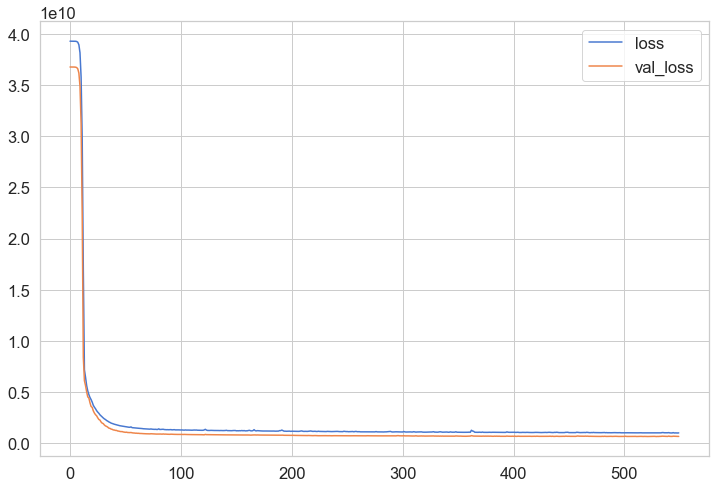

In [84]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

# Evaluation on Test Data

In [85]:
y_pred = model.predict(X_test)

In [86]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 18135.04
Mean Squared Error: 683427527.12
Root Mean Squared Error: 26142.45
Variance score is: 0.87


In [87]:
New_data['SalePrice'].mean()

180921.19589041095

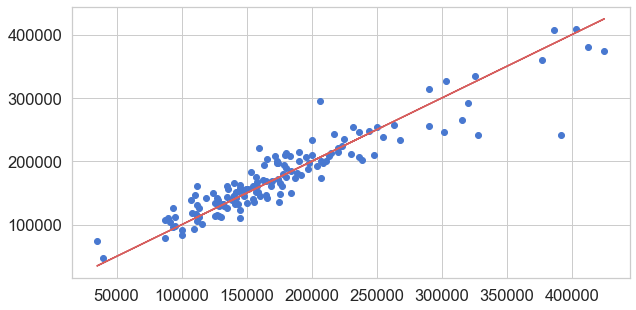

In [88]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

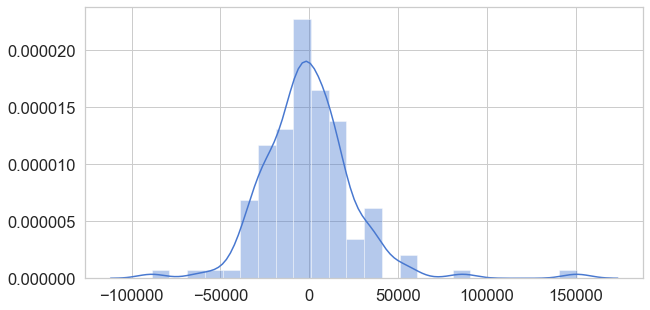

In [89]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

# Multiple Linear Regression vs Keras Regression

In [90]:
print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))

Model: Keras Regression

Mean Absolute Error(MAE): 18135.04
Mean Squared Error(MSE): 683427527.12
Root Mean Squared Error(RMSE): 26142.45
Variance score: 86.53

*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 23208.65
Mean Squared Error(MSE):984141394.09
Root Mean Squared Error(RMSE):31371.03
Variance score: 80.67


# 2nd Neural Network Model

In [91]:
# having 19 nueron is based on the number of available featurs

model5 = Sequential()

model5.add(Dense(10,activation='elu'))
model5.add(Dense(10,activation='elu'))
model5.add(Dense(10,activation='elu'))
model5.add(Dense(10,activation='elu'))
model5.add(Dense(10,activation='elu'))
model5.add(Dense(10,activation='elu'))
model5.add(Dense(11,activation='elu'))
model5.add(Dense(12,activation='elu'))
model5.add(Dense(12,activation='elu'))

#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))

model5.add(Dense(1))

model5.compile(optimizer='adam',loss='mse')

In [92]:
model5.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Train on 1314 samples, validate on 146 samples
Epoch 1/400
1314/1314 [==============================] - 2s 2ms/sample - loss: 39291305198.4658 - val_loss: 36769030873.4247
Epoch 2/400
1314/1314 [==============================] - 0s 49us/sample - loss: 39291042699.1050 - val_loss: 36768728807.4521
Epoch 3/400
1314/1314 [==============================] - 0s 53us/sample - loss: 39290666699.3973 - val_loss: 36768256392.7671
Epoch 4/400
1314/1314 [==============================] - 0s 50us/sample - loss: 39290052184.0609 - val_loss: 36767495658.9589
Epoch 5/400
1314/1314 [==============================] - 0s 47us/sample - loss: 39289026086.1857 - val_loss: 36766146026.9589
Epoch 6/400
1314/1314 [==============================] - 0s 47us/sample - loss: 39287087833.4247 - val_loss: 36763582744.5479
Epoch 7/400
1314/1314 [==============================] - 0s 49us/sample - loss: 39283130168.4992 - val_loss: 36758135345.0959
Epoch 8/400
1314/1314 [==============================] - 0s 49us/sample 

Epoch 66/400
1314/1314 [==============================] - 0s 48us/sample - loss: 1607479965.9056 - val_loss: 1011112096.4384
Epoch 67/400
1314/1314 [==============================] - 0s 44us/sample - loss: 1589244720.5114 - val_loss: 994692396.2740
Epoch 68/400
1314/1314 [==============================] - 0s 44us/sample - loss: 1580559736.8889 - val_loss: 990886796.2740
Epoch 69/400
1314/1314 [==============================] - 0s 43us/sample - loss: 1554967847.7443 - val_loss: 965227293.8082
Epoch 70/400
1314/1314 [==============================] - 0s 56us/sample - loss: 1542132142.5632 - val_loss: 956007390.6849
Epoch 71/400
1314/1314 [==============================] - 0s 76us/sample - loss: 1534662801.8265 - val_loss: 942774839.2329
Epoch 72/400
1314/1314 [==============================] - 0s 79us/sample - loss: 1512610836.3592 - val_loss: 935242238.2466
Epoch 73/400
1314/1314 [==============================] - 0s 78us/sample - loss: 1500661679.7321 - val_loss: 922114390.3562
Epoch 7

Epoch 132/400
1314/1314 [==============================] - 0s 52us/sample - loss: 1245294722.1431 - val_loss: 738143625.6438
Epoch 133/400
1314/1314 [==============================] - 0s 49us/sample - loss: 1270431736.7915 - val_loss: 743071719.4521
Epoch 134/400
1314/1314 [==============================] - 0s 50us/sample - loss: 1245657966.2709 - val_loss: 728684542.2466
Epoch 135/400
1314/1314 [==============================] - 0s 40us/sample - loss: 1247442979.0685 - val_loss: 718612460.7123
Epoch 136/400
1314/1314 [==============================] - 0s 71us/sample - loss: 1239362670.8554 - val_loss: 710977920.0000
Epoch 137/400
1314/1314 [==============================] - 0s 72us/sample - loss: 1232808807.8417 - val_loss: 707896895.1233
Epoch 138/400
1314/1314 [==============================] - 0s 82us/sample - loss: 1233040070.2344 - val_loss: 709213110.7945
Epoch 139/400
1314/1314 [==============================] - 0s 87us/sample - loss: 1233070363.6651 - val_loss: 705695786.9589


1314/1314 [==============================] - 0s 70us/sample - loss: 1099964685.3942 - val_loss: 643309118.2466
Epoch 198/400
1314/1314 [==============================] - 0s 70us/sample - loss: 1096831468.9072 - val_loss: 644181398.3562
Epoch 199/400
1314/1314 [==============================] - 0s 81us/sample - loss: 1094092804.9193 - val_loss: 641250272.4384
Epoch 200/400
1314/1314 [==============================] - 0s 81us/sample - loss: 1097760347.1781 - val_loss: 642843760.2192
Epoch 201/400
1314/1314 [==============================] - 0s 83us/sample - loss: 1160602899.7747 - val_loss: 655096922.3014
Epoch 202/400
1314/1314 [==============================] - 0s 82us/sample - loss: 1116553937.1446 - val_loss: 641692528.2192
Epoch 203/400
1314/1314 [==============================] - 0s 83us/sample - loss: 1097298889.7412 - val_loss: 656884860.9315
Epoch 204/400
1314/1314 [==============================] - 0s 87us/sample - loss: 1095979843.5068 - val_loss: 635262258.8493
Epoch 205/400


1314/1314 [==============================] - 0s 74us/sample - loss: 994083477.6256 - val_loss: 600667808.4384
Epoch 263/400
1314/1314 [==============================] - 0s 73us/sample - loss: 1013838097.0959 - val_loss: 595860245.0411
Epoch 264/400
1314/1314 [==============================] - 0s 81us/sample - loss: 994353369.4247 - val_loss: 594238763.8356
Epoch 265/400
1314/1314 [==============================] - 0s 83us/sample - loss: 992805572.3836 - val_loss: 594116653.1507
Epoch 266/400
1314/1314 [==============================] - 0s 76us/sample - loss: 997765824.3896 - val_loss: 598698286.9041
Epoch 267/400
1314/1314 [==============================] - 0s 79us/sample - loss: 986434297.3760 - val_loss: 602669864.3288
Epoch 268/400
1314/1314 [==============================] - 0s 86us/sample - loss: 990806383.4399 - val_loss: 595676312.5479
Epoch 269/400
1314/1314 [==============================] - 0s 76us/sample - loss: 985388751.9756 - val_loss: 599920922.3014
Epoch 270/400
1314/13

1314/1314 [==============================] - 0s 106us/sample - loss: 934247974.4779 - val_loss: 566154551.2329
Epoch 329/400
1314/1314 [==============================] - 0s 94us/sample - loss: 925127445.4307 - val_loss: 568601049.8630
Epoch 330/400
1314/1314 [==============================] - 0s 81us/sample - loss: 958214122.4718 - val_loss: 563233957.6986
Epoch 331/400
1314/1314 [==============================] - 0s 84us/sample - loss: 935853639.4521 - val_loss: 567118722.4110
Epoch 332/400
1314/1314 [==============================] - 0s 87us/sample - loss: 937482658.6788 - val_loss: 568123651.5068
Epoch 333/400
1314/1314 [==============================] - 0s 88us/sample - loss: 922371300.5297 - val_loss: 573186542.9041
Epoch 334/400
1314/1314 [==============================] - 0s 83us/sample - loss: 928053975.1842 - val_loss: 570405914.3014
Epoch 335/400
1314/1314 [==============================] - 0s 82us/sample - loss: 928487570.8980 - val_loss: 569908447.1233
Epoch 336/400
1314/13

Epoch 394/400
1314/1314 [==============================] - 0s 47us/sample - loss: 868086745.7169 - val_loss: 564754165.9178
Epoch 395/400
1314/1314 [==============================] - 0s 45us/sample - loss: 867841391.9269 - val_loss: 566263809.7534
Epoch 396/400
1314/1314 [==============================] - 0s 47us/sample - loss: 878186680.2070 - val_loss: 560160117.4795
Epoch 397/400
1314/1314 [==============================] - 0s 45us/sample - loss: 869962390.4049 - val_loss: 564651445.0411
Epoch 398/400
1314/1314 [==============================] - 0s 59us/sample - loss: 902353455.0989 - val_loss: 565075616.4384
Epoch 399/400
1314/1314 [==============================] - 0s 59us/sample - loss: 885973918.4901 - val_loss: 564223351.2329
Epoch 400/400
1314/1314 [==============================] - 0s 47us/sample - loss: 874678825.4003 - val_loss: 565933851.1781


In [93]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             multiple                  130       
_________________________________________________________________
dense_57 (Dense)             multiple                  110       
_________________________________________________________________
dense_58 (Dense)             multiple                  110       
_________________________________________________________________
dense_59 (Dense)             multiple                  110       
_________________________________________________________________
dense_60 (Dense)             multiple                  110       
_________________________________________________________________
dense_61 (Dense)             multiple                  110       
_________________________________________________________________
dense_62 (Dense)             multiple                 

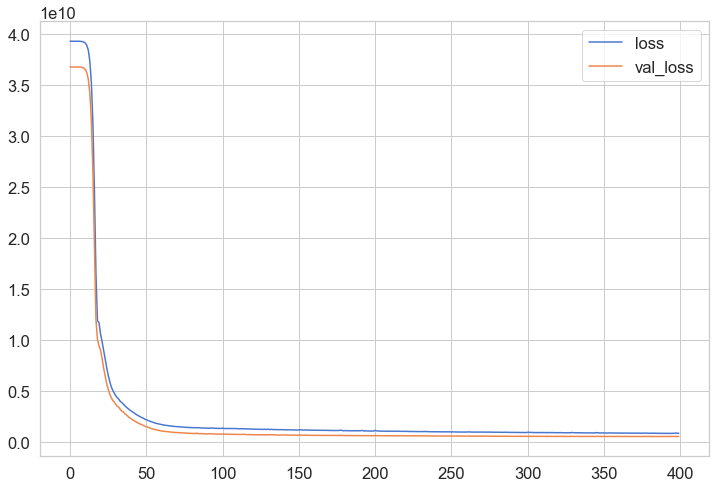

In [94]:
loss_df = pd.DataFrame(model5.history.history)
loss_df.plot(figsize=(12,8))

In [95]:
y_prediction = model5.predict(X_test)

In [96]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_prediction)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_prediction)))

Mean Absolute Error: 17121.15
Mean Squared Error: 565933876.95
Root Mean Squared Error: 23789.36
Variance score is: 0.89


# Linear Regression by using keras

In [97]:
from tensorflow.keras import Sequential
from tensorflow import keras

In [98]:
from tensorflow import keras

In [99]:
squareFeet = df_train[['GrLivArea']].values #x value
salePrice = df_train[['SalePrice']].values #y value

In [100]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(1,)))
model.compile(keras.optimizers.Adam(lr=1), 'mean_squared_error')

model.fit(squareFeet,salePrice, epochs=50, batch_size=10)

Epoch 1/50
1460/1460 [==============================] - 2s 1ms/sample - loss: 14637043826.8493
Epoch 2/50
1460/1460 [==============================] - 1s 571us/sample - loss: 3379796381.3699
Epoch 3/50
1460/1460 [==============================] - 1s 499us/sample - loss: 3193285373.8082
Epoch 4/50
1460/1460 [==============================] - 1s 525us/sample - loss: 3183347262.9041
Epoch 5/50
1460/1460 [==============================] - 1s 566us/sample - loss: 3194190963.9452
Epoch 6/50
1460/1460 [==============================] - 1s 611us/sample - loss: 3193468462.9041
Epoch 7/50
1460/1460 [==============================] - 1s 500us/sample - loss: 3197548366.2466
Epoch 8/50
1460/1460 [==============================] - 1s 549us/sample - loss: 3197341612.4932
Epoch 9/50
1460/1460 [==============================] - 1s 607us/sample - loss: 3214446711.8904
Epoch 10/50
1460/1460 [==============================] - 1s 653us/sample - loss: 3195386907.8356
Epoch 11/50
1460/1460 [=================

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


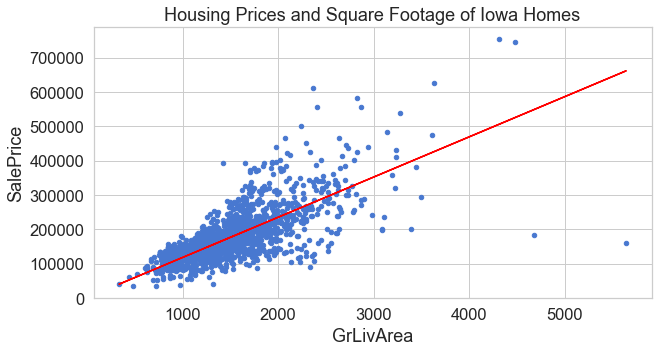

In [101]:
#Plot datapoints
df_train.plot(kind='scatter',
       x='GrLivArea',
       y='SalePrice', title='Housing Prices and Square Footage of Iowa Homes')


y_prediction = model.predict(squareFeet) #The predicted housing price based on square feet

#Plot the linear regression line
plt.plot(squareFeet, y_prediction, color='red')

In [102]:
newSF = 2000
print(model.predict([newSF]))

[[235125.89]]


# Neural Networks Model

In [103]:
#df_train

In [104]:
#df_train['OverallQual']

In [105]:
#df_train['GarageCars']

In [106]:
#df_train['SalePrice']


df2=df_train[['YearBuilt','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','YrSold','SalePrice']]

In [107]:
#df2

In [108]:
X = df2.drop(columns=['SalePrice'])
Y = df2[['SalePrice']]

In [109]:
model6 = keras.models.Sequential()

model6.add(keras.layers.Dense(18, activation='relu', input_shape=(8,)))
model6.add(keras.layers.Dense(18, activation='relu'))
model6.add(keras.layers.Dense(18, activation='relu'))
model6.add(keras.layers.Dense(18, activation='relu'))
model6.add(keras.layers.Dense(18, activation='relu'))
model6.add(keras.layers.Dense(18, activation='relu'))
model6.add(keras.layers.Dense(18, activation='relu'))
model6.add(keras.layers.Dense(1))

model6.compile(optimizer='adam', loss='mean_squared_error')

In [110]:
model6.fit(X, Y, epochs=30, callbacks=[keras.callbacks.EarlyStopping(patience=3)])

#model6.fit(x=X_train,y=y_train,
#          validation_data=(X_test,y_test),
#          batch_size=128,epochs=400)

Epoch 1/30
1460/1460 [==============================] - 2s 2ms/sample - loss: 38654595756.5370
Epoch 2/30
1460/1460 [==============================] - 0s 148us/sample - loss: 29352624217.7753
Epoch 3/30
1460/1460 [==============================] - 0s 142us/sample - loss: 6283839995.0904
Epoch 4/30
1460/1460 [==============================] - 0s 143us/sample - loss: 5193773939.7260
Epoch 5/30
1460/1460 [==============================] - 0s 208us/sample - loss: 5109085284.9973
Epoch 6/30
1460/1460 [==============================] - 0s 214us/sample - loss: 4947769501.8082
Epoch 7/30
1460/1460 [==============================] - 0s 211us/sample - loss: 4834927324.5808
Epoch 8/30
1460/1460 [==============================] - 0s 181us/sample - loss: 4742508846.6411
Epoch 9/30
1460/1460 [==============================] - 0s 193us/sample - loss: 4675269159.2767
Epoch 10/30
1460/1460 [==============================] - 0s 184us/sample - loss: 4649633595.2658
Epoch 11/30
1460/1460 [================

Epoch 29/30
1460/1460 [==============================] - 0s 199us/sample - loss: 3625360830.0712
Epoch 30/30
1460/1460 [==============================] - 0s 230us/sample - loss: 3488333759.4740


In [114]:
test_data = np.array([2003,854,1710,2,1,3,8,2008])

print(model6.predict(test_data.reshape(1,8), batch_size=1))

[[201084.5]]
